In [1]:
from quspin.operators import hamiltonian
from quspin.basis import tensor_basis,spinless_fermion_basis_1d
from discreteWigner_v3 import Wigner_D_rho_2, Neg
import numpy as np
import time

In [6]:
def Hamil(L, J1=1.0, J2=0.2, U=1.0, bias=0):
    """
    returns energies of H and engativities of the impurity density matrix
    #
    # parameters of the model 
    #
    # L system size
    J1 and J2 are hoppings
    U repulsion
    bias bias term"""
    #
    # construct basis 
    #
    # Here we use tensor basis instead of spinfull fermions 
    # it is necessery for getting the reduced density matrix
    basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
    basis_down = spinless_fermion_basis_1d(L,Nf=1)
    basis = tensor_basis(basis_up,basis_down)
    #
    #construct Hamiltonian
    #
    H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
    H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
    H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
    H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
    H_nn=[[U,i,i] for i in range(L)]
    H_bias=[[bias*(i+1)/L,i] for i in range(L)]
    #
    #Hamiltonian
    static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
    H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

    start_time = time.time() 
    #E=H.eigvalsh() # compute only spectrum
    E,V=H.eigh()
    end_time = time.time()
    #print(E)
    print("time=",end_time-start_time)

    #
    # calculate negative value of discrete Wigner function (negativity)
    #
    xmax=L/2. # don't know why :)
    negative_list=[] 
    for k in range(len(E)):
        rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
        W=Wigner_D_rho_2(rho, xmax)
        negative=Neg(W)
        negative_list.append(negative)
    return E, negative_list

Hermiticity check passed!
time= 0.19347763061523438


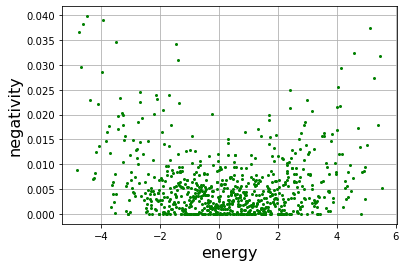

0.03982316224159715


In [9]:
energies, negative_list = Hamil(L=9)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energies, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

# Вверху L=9

Hermiticity check passed!
time= 3.126335382461548


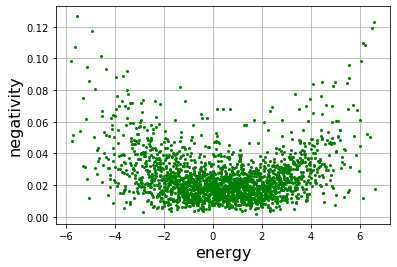

0.12666819530553183


In [8]:
energies, negative_list = Hamil(L=10)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energies, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

# Вверху L=10

Hermiticity check passed!
time= 12.752114534378052


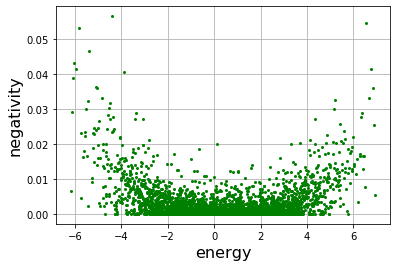

0.056586048813022705


In [7]:
energies, negative_list = Hamil(L=11)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energies, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

# Вверху L=11

In [12]:
energies, negative_list = Hamil(L=12)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energies, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

Hermiticity check passed!


MemoryError: Unable to allocate 689. MiB for an array with shape (9504, 9504) and data type float64

In [2]:
L=12
J1=1.0
J2=0.2
U=1.0
bias=0
#
    # construct basis 
    #
    # Here we use tensor basis instead of spinfull fermions 
    # it is necessery for getting the reduced density matrix
basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
basis_down = spinless_fermion_basis_1d(L,Nf=1)
basis = tensor_basis(basis_up,basis_down)
    #
    #construct Hamiltonian
    #
H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
H_nn=[[U,i,i] for i in range(L)]
H_bias=[[bias*(i+1)/L,i] for i in range(L)]
    #
    #Hamiltonian
static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

start_time = time.time() 
    #E=H.eigvalsh() # compute only spectrum
E,V=H.eigh()
end_time = time.time()
    #print(E)
print("time=",end_time-start_time)

    #
    # calculate negative value of discrete Wigner function (negativity)
    #
xmax=L/2. # don't know why :)
negative_list=[] 
for k in range(len(E)):
    rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
    W=Wigner_D_rho_2(rho, xmax)
    negative=Neg(W)
    negative_list.append(negative)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(energies, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

Hermiticity check passed!
time= 191.1995198726654


NameError: name 'energies' is not defined

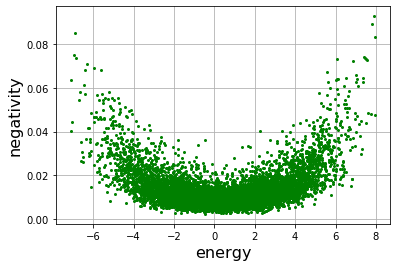

0.09260651291638079


In [3]:
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

# Вверху L=12

Hermiticity check passed!
time= 772.496328830719


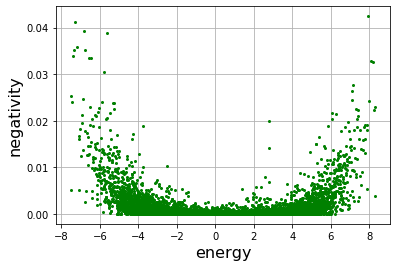

0.04241822190100943


In [4]:
L=13
J1=1.0
J2=0.2
U=1.0
bias=0
#
    # construct basis 
    #
    # Here we use tensor basis instead of spinfull fermions 
    # it is necessery for getting the reduced density matrix
basis_up = spinless_fermion_basis_1d(L,Nf=int(L/2-1))  #(L/2-1) fermions and 1 impurity
basis_down = spinless_fermion_basis_1d(L,Nf=1)
basis = tensor_basis(basis_up,basis_down)
    #
    #construct Hamiltonian
    #
H1_pm=[[-J1,i,(i+1)] for i in range(L-1)] 
H2_pm=[[-J2,i,(i+1)] for i in range(L-1)] 
H1_mp=[[+J1,i,(i+1)] for i in range(L-1)] 
H2_mp=[[+J2,i,(i+1)] for i in range(L-1)] 
H_nn=[[U,i,i] for i in range(L)]
H_bias=[[bias*(i+1)/L,i] for i in range(L)]
    #
    #Hamiltonian
static=[["+-|",H1_pm],["-+|",H1_mp],["|+-",H2_pm],["|-+",H2_mp],["n|n", H_nn],["n|", H_bias]]
H = hamiltonian(static,[],dtype=np.float64,basis=basis,check_pcon=False,check_symm=False)

start_time = time.time() 
    #E=H.eigvalsh() # compute only spectrum
E,V=H.eigh()
end_time = time.time()
    #print(E)
print("time=",end_time-start_time)

    #
    # calculate negative value of discrete Wigner function (negativity)
    #
xmax=L/2. # don't know why :)
negative_list=[] 
for k in range(len(E)):
    rho=basis.partial_trace(V[:,k],sub_sys_A='left',return_rdm='B')
    W=Wigner_D_rho_2(rho, xmax)
    negative=Neg(W)
    negative_list.append(negative)
#
# plot
#
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E, negative_list, marker='o', color='green',linestyle='None', markersize=2)

plt.grid()
plt.xlabel('energy', fontsize=16)
plt.ylabel('negativity',fontsize=16)
plt.show()
print(max(negative_list))

# Вверху L=13